# Preparing the Dataset

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

C:\Users\parth\Anaconda3\envs\Tensorflow-GPU-CNN\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\parth\Anaconda3\envs\Tensorflow-GPU-CNN\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\parth\Anaconda3\envs\Tensorflow-GPU-CNN\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\parth\Anaconda3\envs\Tensorflow-GPU-CNN\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\parth\Anaconda3\envs\Tensorflow-GPU-CNN\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\parth\A

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

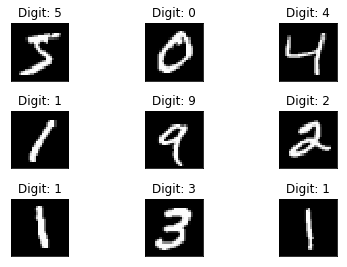

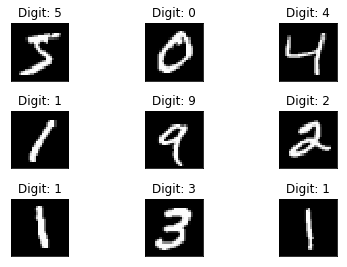

In [3]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
fig

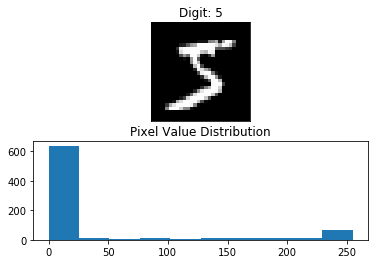

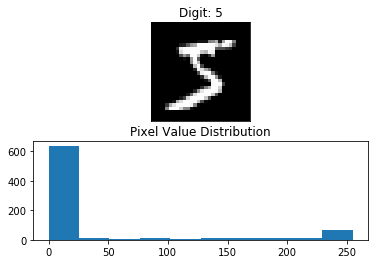

In [4]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

In [5]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [6]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [7]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


# Building the Network

In [8]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Compiling and Training the Model

In [9]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
11s - loss: 0.2487 - acc: 0.9252 - val_loss: 0.1048 - val_acc: 0.9662
Epoch 2/10
11s - loss: 0.1013 - acc: 0.9686 - val_loss: 0.0803 - val_acc: 0.9742
Epoch 3/10
11s - loss: 0.0730 - acc: 0.9772 - val_loss: 0.0755 - val_acc: 0.9759
Epoch 4/10
11s - loss: 0.0564 - acc: 0.9819 - val_loss: 0.0686 - val_acc: 0.9778
Epoch 5/10
11s - loss: 0.0475 - acc: 0.9849 - val_loss: 0.0712 - val_acc: 0.9777
Epoch 6/10
10s - loss: 0.0402 - acc: 0.9868 - val_loss: 0.0697 - val_acc: 0.9807
Epoch 7/10
11s - loss: 0.0350 - acc: 0.9883 - val_loss: 0.0676 - val_acc: 0.9799
Epoch 8/10
10s - loss: 0.0312 - acc: 0.9897 - val_loss: 0.0633 - val_acc: 0.9817
Epoch 9/10
10s - loss: 0.0270 - acc: 0.9906 - val_loss: 0.0642 - val_acc: 0.9827
Epoch 10/10
11s - loss: 0.0253 - acc: 0.9916 - val_loss: 0.0720 - val_acc: 0.9812
Saved trained model at ./keras_mnist.h5 


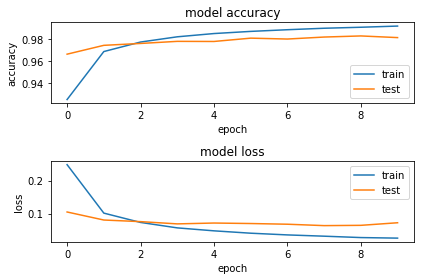

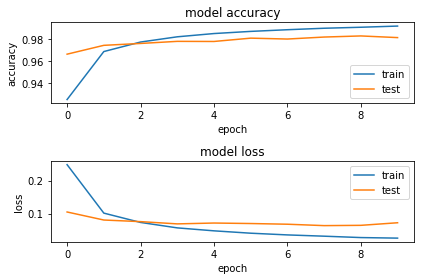

In [10]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=2,
          validation_data=(X_test, Y_test))

save_dir = "./"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

# Evaluate the Model's Performance

In [11]:
mnist_model = load_model('./keras_mnist.h5')
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.07201596726501229
Test Accuracy 0.9812


 9568/10000 [===========================>..] - ETA: 0s
9812  classified correctly
188  classified incorrectly


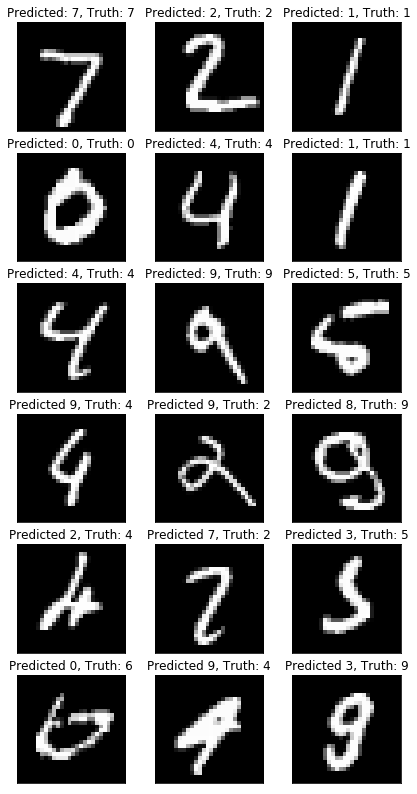

In [12]:
mnist_model = load_model('./keras_mnist.h5')
predicted_classes = mnist_model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

plt.rcParams['figure.figsize'] = (7,14)
figure_evaluation = plt.figure()

for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])



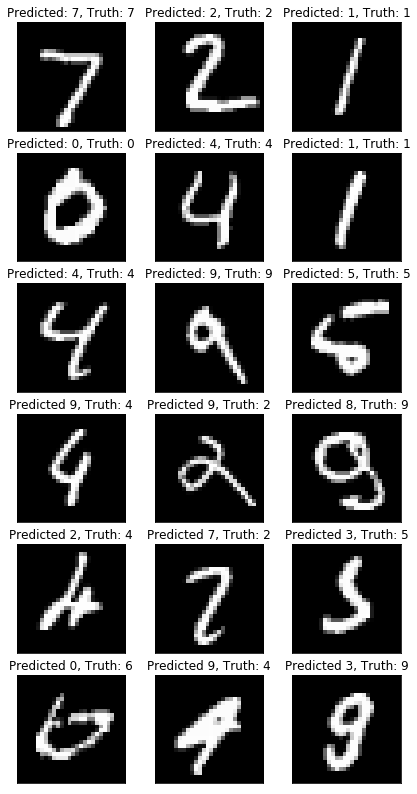

In [14]:
figure_evaluation